In [3]:
import tweepy, codecs


In [6]:
## fill in your Twitter credentials
consumer_key = "Nd1XKXyJC2KlgsyPgg8bGMVdM"
consumer_secret = "zryy0i4IHNKN2EgAM7kwhONmB5lJ9J3V4PGnYHDm1Hf8SdFbhU"
access_token = "2532281539-xPYgXcEEtvXhp48VQQrNwKEH8FfmkBfFsH5YbeK"
access_token_secret = "jKRv71H3wdPS87X6WUzy6aghVQe9kdw5XEAQOInA5SkNx"

In [10]:
## let Tweepy set up an instance of the REST API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [83]:
## fill in your search query and store your results in a variable
results = api.search_tweets(q = "trudeau", lang = "en", result_type = "recent", count = 4)

## use the codecs library to write the text of the Tweets to a .txt file
file = codecs.open("./trudeau_tweets.txt", "w", "utf-8")
for result in results:
    clean_tweets =  re.sub(r'[?|$|.|!|@|:|/|\|&|;|]',r'',result.text)
    print("clean_tweets:",clean_tweets)
    file.write(clean_tweets)
    file.write("\n")
file.close()

clean_tweets: RT MaximeBernier There aren’t enough illegal migrants in Canada, so the Liberals have reopened Roxham road Will Trudeau tweet again to i…
clean_tweets: RT MrStache9 The House just gave a standing ovation for the new Speaker Trudeau and Freeland and a another one or two did not stand


In [87]:

import http.client
import json, re


conn = http.client.HTTPSConnection("twinword-sentiment-analysis.p.rapidapi.com")
headers = {
    'x-rapidapi-host': "twinword-sentiment-analysis.p.rapidapi.com",
    'x-rapidapi-key': "460cfb3b13msh1e96bee64b6afeap1d1871jsn7f099b402a70"
    }


In [88]:
import csv, io

count=0
with io.open('Trudeau_Tweets_polarized.csv', 'w', encoding='utf8', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Tweet", "Sentiment"])
    
    with io.open("trudeau_tweets.txt", 'r', encoding='utf8') as f:
        for tweet in f.readlines():
    ## Remove extra spaces or newlines around the text
            tweet = tweet.strip()
            count += 1
            print("count:",count)
            
        ## Format tweet in the request pattern  
            tweet_tourl_string = urllib.request.pathname2url(tweet)
            full_url = "/analyze/?text=" + tweet_tourl_string  
            conn.request("GET", full_url, headers=headers)


            ## Reject tweets which are empty so you don’t waste your API credits
            if len(tweet) == 0:
                print('skipped')
                continue


            print(tweet)
            conn.request("GET", full_url, headers=headers)
            res = conn.getresponse()
            respBody = res.read()
            sentiment = json.loads(respBody)
            print("Sentiment:", sentiment["type"])
            csv_writer.writerow([tweet, sentiment['type']])

countme: 1
RT MaximeBernier There aren’t enough illegal migrants in Canada, so the Liberals have reopened Roxham road Will Trudeau tweet again to i…
csv_second_column negative
countme: 2
RT MrStache9 The House just gave a standing ovation for the new Speaker Trudeau and Freeland and a another one or two did not stand
csv_second_column neutral


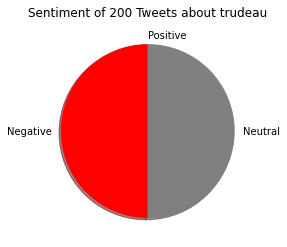

In [95]:

## import the libraries
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import csv

## open up your csv file with the sentiment results
with open('Trudeau_Tweets_polarized.csv', 'r', encoding = 'utf8') as csvfile:
## use Pandas to read the “Sentiment” column,
    df = pd.read_csv(csvfile)
    sent = df["Sentiment"]

## use Counter to count how many times each sentiment appears
## and save each as a variable
counter = Counter(sent)
positive = counter['positive']
negative = counter['negative']
neutral = counter['neutral']

## declare the variables for the pie chart, using the Counter variables for “sizes”
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]
colors = ['green', 'red', 'grey']
yourtext = "Trudeau"

## use matplotlib to plot the chart
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title("Sentiment of 200 Tweets about "+yourtext)
plt.show()